# Parametric non-intrusive model order reduction for synthetic data

Here we describe the application of methods sPOD-NN, sPOD-I and POD-NN on a 1D syntheticaly generated data set

In [1]:
import sys
sys.path.append('../sPOD/lib/')
sys.path.append('../DL-ROM/LIB/')

In [2]:
from synthetic_sup import synthetic_sup
import numpy as np

## Basis reconstruction for the synthetic data

In this part we : 

<ul>
<li>Generate the 1D synthetic data with $M = 500$ and $N_t = 500$ with $training\_samples$ being the number of different values of parameter considered for basis reconstruction and further network training and $testing\_sample$ being the value of test parameter.</li>
<li>Perform sPOD and POD on the generated data.</li>
<li>Extract the time amplitudes according to Eq.(8) and Eq.(13) from the paper.</li>
</ul>

The inputs here include : 
<ul>
<li>$spod\_iter$ is the number of iterations for the sPOD algorithm.</li>
<li>$nmodes$ are the number of singular values taken into consideration while creating the data.</li>
<li>$plot\_offline\_data$ is the switch variable for the user to plot the results of the basis reconstruction.</li>
</ul>

#############################################
Synthetic data checks....
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Check 1...
Transformation interpolation error =  3.2648e-05 


/Users/shubhadityaburela/Python/Paper1_sPOD-NN/sPOD-NN/tests/../sPOD/lib/sPOD_tools.py:598: UserWarning: Using rSVD to accelarate decomposition procedure may lead to different results, pls check!
  warn("Using rSVD to accelarate decomposition procedure may lead to different results, pls check!")
/opt/homebrew/Caskroom/miniforge/base/envs/PyTorch/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


it=1 rel_err= 4.9e-01 norm(dres) = 4.8e-05 norm(Q-Qtilde)/norm(q) =4.9e-01 norm(E)/norm(q) = 0.0e+00 tcpu = 0.33, ranks_frame =  1 1
it=2 rel_err= 1.6e-01 norm(dres) = 3.2e-05 norm(Q-Qtilde)/norm(q) =1.6e-01 norm(E)/norm(q) = 0.0e+00 tcpu = 0.34, ranks_frame =  2 2
it=3 rel_err= 8.4e-02 norm(dres) = 7.7e-06 norm(Q-Qtilde)/norm(q) =8.4e-02 norm(E)/norm(q) = 0.0e+00 tcpu = 0.30, ranks_frame =  2 2
it=4 rel_err= 8.0e-02 norm(dres) = 4.2e-07 norm(Q-Qtilde)/norm(q) =8.0e-02 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  2 2
it=5 rel_err= 7.9e-02 norm(dres) = 7.0e-08 norm(Q-Qtilde)/norm(q) =7.9e-02 norm(E)/norm(q) = 0.0e+00 tcpu = 0.29, ranks_frame =  2 2
it=6 rel_err= 4.2e-02 norm(dres) = 3.7e-06 norm(Q-Qtilde)/norm(q) =4.2e-02 norm(E)/norm(q) = 0.0e+00 tcpu = 0.30, ranks_frame =  3 3
it=7 rel_err= 2.9e-02 norm(dres) = 1.3e-06 norm(Q-Qtilde)/norm(q) =2.9e-02 norm(E)/norm(q) = 0.0e+00 tcpu = 0.32, ranks_frame =  3 3
it=8 rel_err= 2.8e-02 norm(dres) = 1.1e-07 norm(Q-Qtilde)/norm(q) =2.

it=63 rel_err= 5.2e-03 norm(dres) = 2.4e-09 norm(Q-Qtilde)/norm(q) =5.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.30, ranks_frame =  5 5
it=64 rel_err= 5.2e-03 norm(dres) = 2.2e-09 norm(Q-Qtilde)/norm(q) =5.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.28, ranks_frame =  5 5
it=65 rel_err= 5.2e-03 norm(dres) = 2.0e-09 norm(Q-Qtilde)/norm(q) =5.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.29, ranks_frame =  5 5
it=66 rel_err= 5.2e-03 norm(dres) = 1.9e-09 norm(Q-Qtilde)/norm(q) =5.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.28, ranks_frame =  5 5
it=67 rel_err= 5.1e-03 norm(dres) = 1.7e-09 norm(Q-Qtilde)/norm(q) =5.1e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.29, ranks_frame =  5 5
it=68 rel_err= 5.1e-03 norm(dres) = 1.6e-09 norm(Q-Qtilde)/norm(q) =5.1e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.29, ranks_frame =  5 5
it=69 rel_err= 5.1e-03 norm(dres) = 1.5e-09 norm(Q-Qtilde)/norm(q) =5.1e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.30, ranks_frame =  5 5
it=70 rel_err= 5.1e-03 norm(dres) = 1.4e-09 norm(Q-Qtilde)/nor

it=124 rel_err= 3.3e-03 norm(dres) = 1.9e-09 norm(Q-Qtilde)/norm(q) =3.3e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.29, ranks_frame =  6 6
it=125 rel_err= 3.3e-03 norm(dres) = 1.7e-09 norm(Q-Qtilde)/norm(q) =3.3e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.43, ranks_frame =  6 6
it=126 rel_err= 3.3e-03 norm(dres) = 1.6e-09 norm(Q-Qtilde)/norm(q) =3.3e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  6 6
it=127 rel_err= 3.2e-03 norm(dres) = 1.5e-09 norm(Q-Qtilde)/norm(q) =3.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.32, ranks_frame =  6 6
it=128 rel_err= 3.2e-03 norm(dres) = 1.3e-09 norm(Q-Qtilde)/norm(q) =3.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.49, ranks_frame =  6 6
it=129 rel_err= 3.2e-03 norm(dres) = 1.2e-09 norm(Q-Qtilde)/norm(q) =3.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.33, ranks_frame =  6 6
it=130 rel_err= 3.2e-03 norm(dres) = 1.0e-09 norm(Q-Qtilde)/norm(q) =3.2e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.32, ranks_frame =  6 6
it=131 rel_err= 3.2e-03 norm(dres) = 9.2e-10 norm(Q-Qti

it=185 rel_err= 1.6e-03 norm(dres) = 4.4e-09 norm(Q-Qtilde)/norm(q) =1.6e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.39, ranks_frame =  8 8
it=186 rel_err= 1.6e-03 norm(dres) = 1.6e-09 norm(Q-Qtilde)/norm(q) =1.6e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=187 rel_err= 1.6e-03 norm(dres) = 1.8e-09 norm(Q-Qtilde)/norm(q) =1.6e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=188 rel_err= 1.6e-03 norm(dres) = 1.6e-09 norm(Q-Qtilde)/norm(q) =1.6e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=189 rel_err= 1.5e-03 norm(dres) = 1.3e-09 norm(Q-Qtilde)/norm(q) =1.5e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.45, ranks_frame =  8 8
it=190 rel_err= 1.5e-03 norm(dres) = 1.3e-09 norm(Q-Qtilde)/norm(q) =1.5e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=191 rel_err= 1.5e-03 norm(dres) = 1.2e-09 norm(Q-Qtilde)/norm(q) =1.5e-03 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=192 rel_err= 1.5e-03 norm(dres) = 1.2e-09 norm(Q-Qti

it=246 rel_err= 9.8e-04 norm(dres) = 6.9e-10 norm(Q-Qtilde)/norm(q) =9.8e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=247 rel_err= 9.7e-04 norm(dres) = 6.8e-10 norm(Q-Qtilde)/norm(q) =9.7e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=248 rel_err= 9.6e-04 norm(dres) = 6.7e-10 norm(Q-Qtilde)/norm(q) =9.6e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.33, ranks_frame =  8 8
it=249 rel_err= 9.6e-04 norm(dres) = 6.5e-10 norm(Q-Qtilde)/norm(q) =9.6e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.33, ranks_frame =  8 8
it=250 rel_err= 9.5e-04 norm(dres) = 6.4e-10 norm(Q-Qtilde)/norm(q) =9.5e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.32, ranks_frame =  8 8
it=251 rel_err= 9.4e-04 norm(dres) = 6.3e-10 norm(Q-Qtilde)/norm(q) =9.4e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.35, ranks_frame =  8 8
it=252 rel_err= 9.4e-04 norm(dres) = 6.2e-10 norm(Q-Qtilde)/norm(q) =9.4e-04 norm(E)/norm(q) = 0.0e+00 tcpu = 0.31, ranks_frame =  8 8
it=253 rel_err= 9.3e-04 norm(dres) = 6.1e-10 norm(Q-Qti

/Users/shubhadityaburela/Python/Paper1_sPOD-NN/sPOD-NN/tests/../sPOD/lib/sPOD_tools.py:693: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ReturnValue(qtilde_frames, qtilde, rel_err_list, E, ranks, np.asarray(ranks_hist))


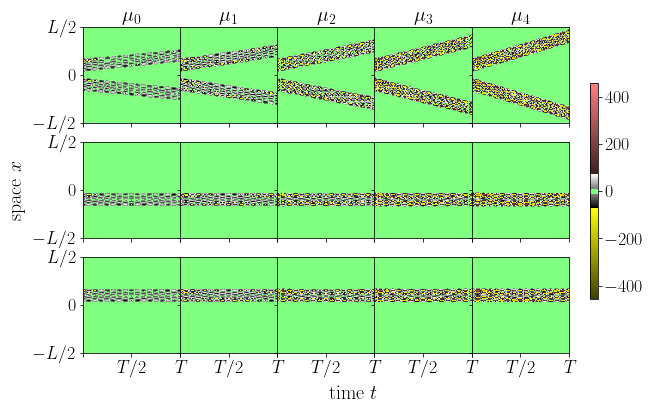

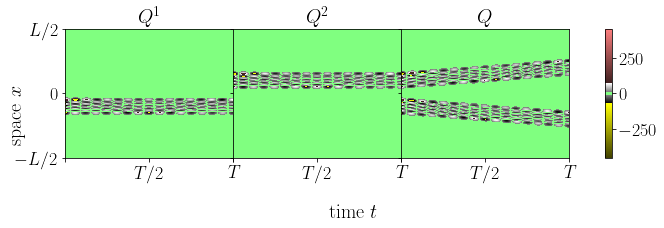

In [3]:
df = synthetic_sup(training_samples=[0.1, 0.15, 0.2, 0.25, 0.3], testing_sample=[0.23], 
                   nmodes=8, spod_iter=300, plot_offline_data=True)

In [4]:
# We collect the time amplitudes, shifts and the parameters for the training as well as the testing data.
TA_TRAIN = df.TA_TRAIN
SHIFTS_TRAIN = df.SHIFTS_TRAIN
PARAMS_TRAIN = df.PARAMS_TRAIN
TA_TEST = df.TA_TEST
SHIFTS_TEST = df.SHIFTS_TEST
PARAMS_TEST = df.PARAMS_TEST
TA_POD_TRAIN = df.TA_POD_TRAIN
TA_POD_TEST = df.TA_POD_TEST

We assemble the $\hat{A}$ matrix according to the Eq.(16) from the paper.

In [5]:
shifts_train = np.concatenate((np.reshape(SHIFTS_TRAIN[0], newshape=[1, -1]), np.reshape(SHIFTS_TRAIN[1], newshape=[1, -1])), axis=0)
shifts_test = np.concatenate((np.reshape(SHIFTS_TEST[0], newshape=[1, -1]), np.reshape(SHIFTS_TEST[1], newshape=[1, -1])), axis=0)

ta_train = np.concatenate((TA_TRAIN, shifts_train), axis=0)
ta_test = np.concatenate((TA_TEST, shifts_test), axis=0)

In [6]:
print("Grid, Nx : {}, Nt : {}".format(df.Nx, df.Nt))
print("Number of sPOD frames : {}".format(df.NumFrames))
print("Number of modes per frame : {}".format(df.nmodes))
print("Number of parameter instances : {}".format(int(int(ta_train.shape[1]) / df.Nt)))
print("Size of training matrix : {} x {}".format(int(ta_train.shape[0]), int(ta_train.shape[1])))

Grid, Nx : 500, Nt : 500
Number of sPOD frames : 2
Number of modes per frame : 8
Number of parameter instances : 5
Size of training matrix : 18 x 2500


## Neural network training

Based on the data which we obtain from the previous step we train our neural network. For the training we first define certain parameters needed for training step. The parameters are mentioned here are:

<ul>
<li>$scaling$ activates the min-max data scaling for efficient training.</li>
<li>$full\_order\_model\_dimension$ is effectively $M$ which is the total number of grid points.</li>
<li>$reduced\_order\_model\_dimension$ is $n_{\mathrm{dof}}$ mentioned in Eq.(19) in the paper.</li>
<li>$totalModes$ is the total number of modes.</li>
<li>$num\_early\_stop$ defines the early stopping criteria for training step.</li>
</ul>

Subsequently the hyperparameters are:
<ul>
<li>$epochs$ sets the total number of epochs for training.</li>
<li>$lr$ sets the learning rate for training.</li>
<li>$loss\_type$ is the type of loss to consider while training options being $L1$ or $MSE$.</li>
<li>$batch\_size$ sets the total number of minibatches for the training data to be broken down into for effective training.</li>
</ul>

In [7]:
params_sPOD = {
        'scaling': True,  
        'full_order_model_dimension': df.Nx,  
        'reduced_order_model_dimension': ta_train.shape[0], 
        'totalModes': ta_train.shape[0] - df.NumFrames,  
        'num_early_stop': 100000  
    
    }
params_POD = {
        'scaling': True,  
        'full_order_model_dimension': df.Nx, 
        'reduced_order_model_dimension': TA_POD_TRAIN.shape[0], 
        'totalModes': TA_POD_TRAIN.shape[0],  
        'num_early_stop': 500  
    }

In [ ]:
# training the model
from DFNN import run_model 
print("#################################")
print("sPOD-NN")
trained_model_sPOD, _, scaling_sPOD = run_model(ta_train, PARAMS_TRAIN, epochs=150000, lr=0.0025, loss_type='L1', 
                                                logs_folder='./DNN_result/synthetic/training_results_sPOD', 
                                                params=params_sPOD, batch_size=50)
print("#################################\n")
print("#################################")
print("POD-NN")
trained_model_POD, _, scaling_POD = run_model(TA_POD_TRAIN, PARAMS_TRAIN, epochs=150000, lr=0.0025, loss_type='L1',
                                              logs_folder='./DNN_result/synthetic/training_results_POD', 
                                              params=params_POD, batch_size=50)
print("#################################\n")

## Neural network prediction

After the training is finished the best weights are saved for network prediction. Here those weights are loaded and the prediction is performed. The dictionary $test$ is defined here which determines whether to run a multi-query scenario or full prediction scenario. If $test['typeOfTest'] = "query"$ then the multi-query scenario is run for which $test['typeOfTest'] = 200$ sets the time step at which the prediction has to be performed. 

Plotting function is only activated for $test['typeOfTest'] = "full"$ which gives us the full prediction throughout all the time steps.

In [8]:
test = {
    'typeOfTest': "full",
    'test_sample': 200
}

In [9]:
# loading the model
from DFNN import scale_params
import torch
import pathlib
import os

log_folder_base_sPOD = 'DNN_result/synthetic/training_results_sPOD/'
log_folder_trained_model_sPOD = sorted(pathlib.Path(log_folder_base_sPOD).glob('*/'), key=os.path.getmtime)[-1]
PATH_sPOD = str(log_folder_trained_model_sPOD) + '/trained_weights/' + 'weights.pt'

log_folder_base_POD = 'DNN_result/synthetic/training_results_POD/'
log_folder_trained_model_POD = sorted(pathlib.Path(log_folder_base_POD).glob('*/'), key=os.path.getmtime)[-1]
PATH_POD = str(log_folder_trained_model_POD) + '/trained_weights/' + 'weights.pt'

PATH_sPOD = 'DNN_result/synthetic/training_results_sPOD/2025_06_26__13-27-59/trained_weights/weights.pt'
PATH_POD = 'DNN_result/synthetic/training_results_POD/2025_06_26__14-24-05/trained_weights/weights.pt'

# Scale the parameters before prediction
if '/trained_weights/weights.pt' in PATH_sPOD: address_sPOD = PATH_sPOD.replace('/trained_weights/weights.pt', '')
scaling_sPOD = np.load(address_sPOD + '/variables/' + 'scaling.npy', allow_pickle=True)

if '/trained_weights/weights.pt' in PATH_POD: address_POD = PATH_POD.replace('/trained_weights/weights.pt', '')
scaling_POD = np.load(address_POD + '/variables/' + 'scaling.npy', allow_pickle=True)

PARAMS_TEST_sPOD = scale_params(PARAMS_TEST, params_sPOD, scaling_sPOD)
PARAMS_TEST_POD = scale_params(PARAMS_TEST, params_POD, scaling_POD)

cpu


In [10]:
if test['typeOfTest'] == "query":
    test_sample = test['test_sample']
    
    ta_test = ta_test[:, test_sample][..., np.newaxis]
    
    df.TA_TEST = df.TA_TEST[:, test_sample][..., np.newaxis]
    df.TA_POD_TEST = df.TA_POD_TEST[:, test_sample][..., np.newaxis]
    
    tmp = []
    for i in range(df.NumFrames):
        tt = []
        for m in range(df.nmodes):
            ampl = df.TA_interp_list[i][m][test_sample, :][np.newaxis, ...]
            tt.append(ampl)
        tmp.append(tt)
    df.TA_interp_list = tmp
    
    df.SHIFTS_TEST[0] = df.SHIFTS_TEST[0][:, test_sample]
    df.SHIFTS_TEST[1] = df.SHIFTS_TEST[1][:, test_sample]
    
    PARAMS_TEST_sPOD = PARAMS_TEST_sPOD[:, test_sample][..., np.newaxis]
    PARAMS_TEST_POD = PARAMS_TEST_POD[:, test_sample][..., np.newaxis]

In [11]:
# testing the model
from DFNN import test_model 
rel_err_sPOD, results_predicted_sPOD = test_model(ta_test, PARAMS_TEST_sPOD, saved_model=True, 
                                                  PATH_TO_WEIGHTS=PATH_sPOD, params=params_sPOD,
                                                  scaling=scaling_sPOD, batch_size=50) 
rel_err_POD, results_predicted_POD = test_model(TA_POD_TEST, PARAMS_TEST_POD, saved_model=True,
                                               PATH_TO_WEIGHTS=PATH_POD, params=params_POD,
                                               scaling=scaling_POD, batch_size=50)

Once the predictions for the time amplitudes and the shifts had been made we now reconstruct the snapshot according to Eq.(11) and Eq.(18) for POD and sPOD based methods respectively

In [12]:
TA_sPOD_pred = results_predicted_sPOD[:-2, :]
shifts_sPOD_pred = results_predicted_sPOD[-2:, :]
TA_POD_pred = results_predicted_POD

#############################################
Online Error checks
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Setting up the shift matrices, with interpolation order:
Forward T^k:     O(h^5)
Backward T^(-k): O(h^5)
Check 1...
Relative error indicator (sPOD-NN) for shift: 1 is 0.002944317678774423
Relative error indicator (sPOD-NN) for shift: 2 is 0.001646906660201061
Relative error indicator (sPOD-I) for shift: 1 is 5.1631544608747467e-17
Relative error indicator (sPOD-I) for shift: 2 is 5.1631544608747467e-17
Check 2...
Relative time amplitude error indicator (sPOD-NN) for frame: 1 is 0.04518517618426777
Relative time amplitude error indicator (sPOD-NN) for frame: 2 is 0.044130705258285795
Relative time amplitude error indicator (sPOD-I) for frame: 1 is 0.000591442039155366
Relative time amplitude error indicator (sPOD-I) for frame: 2 is 0.0009236642797542255
Relative time amplitude error indicator (POD-NN) is 0.994823457258

/opt/homebrew/Caskroom/miniforge/base/envs/PyTorch/lib/python3.9/site-packages/tikzplotlib/_save.py:389: UserWarning: tikzplotlib: Don't know how to handle object <class 'matplotlib.figure.SubFigure'>.
  warnings.warn(


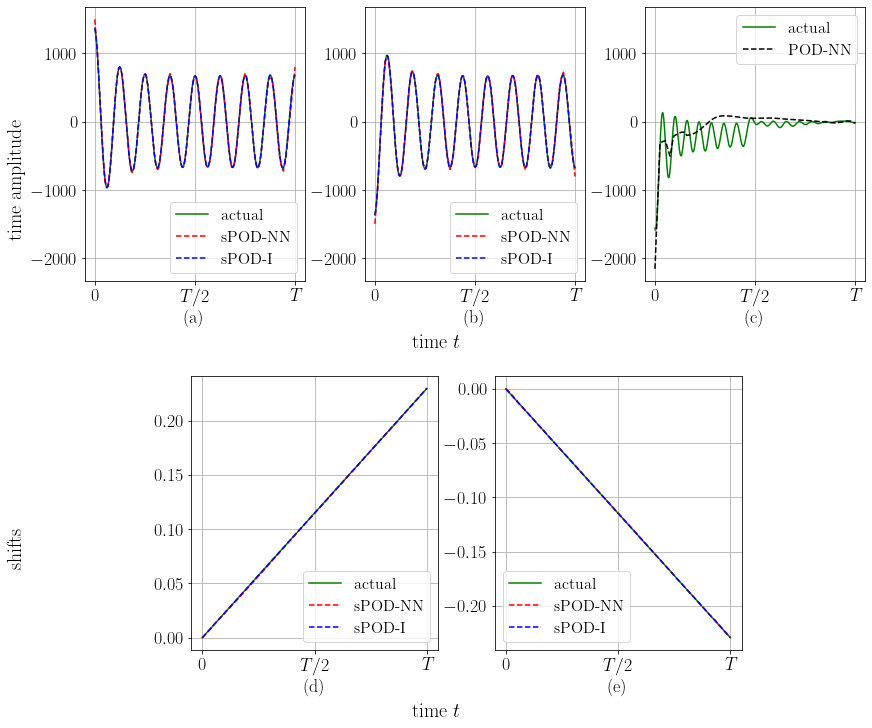

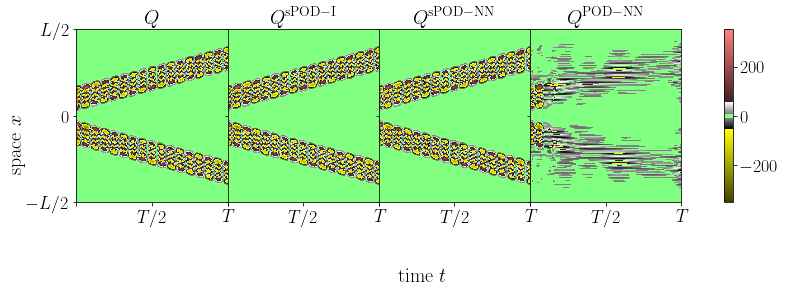

In [13]:
errors, errors_inf = df.OnlinePredictionAnalysis(TA_sPOD_pred, shifts_sPOD_pred, TA_POD_pred, plot_online=True, test_type=test)

## Reconstruction error plots

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
from Helper import save_fig
from statistics import mean

impath = "../plots/images_synthetic/"
os.makedirs(impath, exist_ok=True) 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"]})

SMALL_SIZE = 16   # 16
MEDIUM_SIZE = 18   # 18
BIGGER_SIZE = 20   # 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

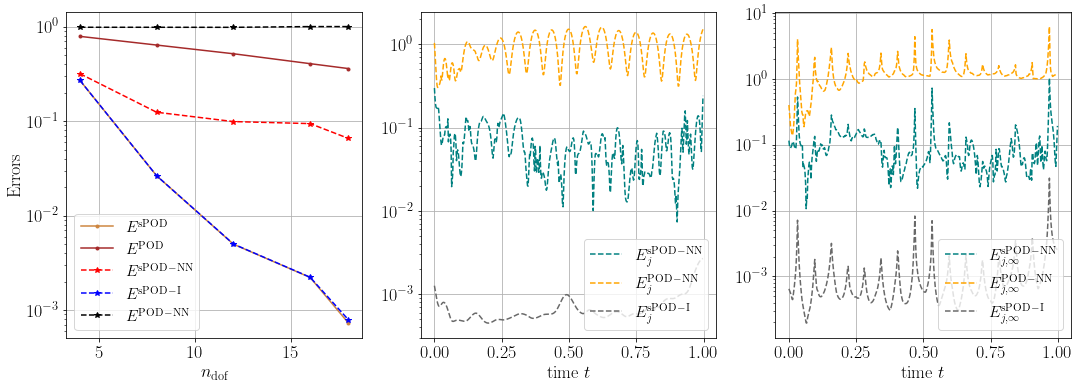

In [19]:
truncated_modes = np.array([2 + 2, 6 + 2, 10 + 2, 14 + 2, 16 + 2])
E_sPOD = np.array([0.26982, 0.02641, 0.00499, 0.00222, 0.00073])
E_POD = np.array([0.78781, 0.63762, 0.51599, 0.40523, 0.35954])
E_sPOD_NN = np.array([0.31729, 0.12410, 0.09889, 0.09411, 0.06559])
E_sPOD_I = np.array([0.26982, 0.02641, 0.00501, 0.00223, 0.00079])
E_POD_NN = np.array([0.9837, 0.9833, 0.9822, 1.0, 1.0])


err_1 = errors[0]
err_2 = errors[1]
err_3 = errors[2]

err_1_inf = errors_inf[0]
err_2_inf = errors_inf[1]
err_3_inf = errors_inf[2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].semilogy(truncated_modes, E_sPOD, color="peru", linestyle='-', marker=".", label=r"$E^{\mathrm{sPOD}}$")
axs[0].semilogy(truncated_modes, E_POD, color="brown", linestyle='-', marker=".", label=r"$E^{\mathrm{POD}}$")
axs[0].semilogy(truncated_modes, E_sPOD_NN, color="red", linestyle='--', marker="*", label=r"$E^{\mathrm{sPOD-NN}}$")
axs[0].semilogy(truncated_modes, E_sPOD_I, color="blue", linestyle='--', marker="*", label=r"$E^{\mathrm{sPOD-I}}$")
axs[0].semilogy(truncated_modes, E_POD_NN, color="black", linestyle='--', marker="*", label=r"$E^{\mathrm{POD-NN}}$")
axs[0].set_xlabel(r"$n_{\mathrm{dof}}$")
axs[0].set_ylabel('Errors')
axs[0].grid()
axs[0].legend(loc='lower left')

axs[1].semilogy(df.t, err_1, color="teal", linestyle='--', label=r"$E^{\mathrm{sPOD-NN}}_j$")
axs[1].semilogy(df.t, err_2, color="orange", linestyle='--', label=r"$E^{\mathrm{POD-NN}}_j$")
axs[1].semilogy(df.t, err_3, color="dimgrey", linestyle='--', label=r"$E^{\mathrm{sPOD-I}}_j$")
axs[1].set_xlabel(r"time $t$")
axs[1].grid()
axs[1].legend(loc='lower right')

axs[2].semilogy(df.t, err_1_inf, color="teal", linestyle='--', label=r"$E^{\mathrm{sPOD-NN}}_{j, \infty}$")
axs[2].semilogy(df.t, err_2_inf, color="orange", linestyle='--', label=r"$E^{\mathrm{POD-NN}}_{j, \infty}$")
axs[2].semilogy(df.t, err_3_inf, color="dimgrey", linestyle='--', label=r"$E^{\mathrm{sPOD-I}}_{j, \infty}$")
axs[2].set_xlabel(r"time $t$")
axs[2].grid()
axs[2].legend(loc='lower right')

save_fig(filepath=impath + 'Rel_err_synthetic', figure=fig)
fig.savefig(impath + "Rel_err_synthetic" + ".pdf", format='pdf',dpi=200, transparent=True, bbox_inches="tight")